# Cleaning and Analysing Job Dissatisfaction from Exit Surveys responses from DETE and TAFE institutes 

We will work with modified exit surveys from employees of the [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland)) (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the TAFE exit survey [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).

Questions we will be trying to answer:
1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Below is a preview of a couple columns we'll work with from the `dete_survey.csv`:  

`ID`: An id used to identify the participant of the survey  
`SeparationType`: The reason why the person's employment ended  
`Cease Date`: The year or month the person's employment ended  
`DETE Start Date`: The year the person began employment with the DETE  

Below is a preview of a couple columns we'll work with from the `tafe_survey.csv`:  

`Record ID`: An id used to identify the participant of the survey  
`Reason for ceasing employment`: The reason why the person's employment ended  
`LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment (in years)  

In [1]:
#import necessary packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#allow matplotlib to work in jupyter
%matplotlib inline

#use ggplot style for the charts
plt.style.use('ggplot')

#force pandas to show all columns of the dataframe in output 
pd.set_option('display.max_columns', None)

In [2]:
#read the database from .csv files into dataframe
dete_survey = pd.read_csv("dete_survey.csv", na_values=['Not Stated'])
tafe_survey = pd.read_csv("tafe_survey.csv")

## Identifying columns required for analysis and dropping irrelevant columns

In [3]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


We can see that in `dete_survey` many columns are irrelevant to the goal of the analysis. Columns from 'Career move to public sector' to 'None of the above' provide information on the reasons for employee exit. The remaining columns till 'Gender' do not provide inside. These columns will be dropped for this analysis.

In [4]:
#drop irrelevant columns from DETE dataframe
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

In [5]:
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [6]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

We can see that in `tafe_survey` also, many columns are irrelevant to the goal of the analysis. Columns from 'Main Factor' to the last 'Workplace Topic' do not provide information on the reasons for employee exit. The remaining columns do provide insight. These columns will be dropped for this analysis.

In [7]:
#drop irrelevant columns from TAFE dataframe
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [8]:
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Record ID                                                                  702 non-null    float64
 1   Institute                                                                  702 non-null    object 
 2   WorkArea                                                                   702 non-null    object 
 3   CESSATION YEAR                                                             695 non-null    float64
 4   Reason for ceasing employment                                              701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector                          437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector        

## Column name standarisation

In [9]:
# View all column names
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [10]:
# Strip trailing whitepaces, replace all spaces between words with '_' and make everything lowercase
dete_survey_updated.columns = dete_survey_updated.columns.str.strip().str.replace(' ','_').str.lower()

# Check new columns
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   822 non-null    int64  
 1   separationtype                       822 non-null    object 
 2   cease_date                           788 non-null    object 
 3   dete_start_date                      749 non-null    float64
 4   role_start_date                      724 non-null    float64
 5   position                             817 non-null    object 
 6   classification                       455 non-null    object 
 7   region                               717 non-null    object 
 8   business_unit                        126 non-null    object 
 9   employment_status                    817 non-null    object 
 10  career_move_to_public_sector         822 non-null    bool   
 11  career_move_to_private_sector   

In [11]:
#Make a map for renaming columns in TAFE dataset where columns with similar data as DETE have the same name
mapping = {
    'Record ID': 'id','CESSATION YEAR': 'cease_date','Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender','CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status','Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
}

In [12]:
tafe_survey_updated.rename(columns=mapping, inplace=True)

In [13]:
# View new columns
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   702 non-null    float64
 1   Institute                                            702 non-null    object 
 2   WorkArea                                             702 non-null    object 
 3   cease_date                                           695 non-null    float64
 4   separationtype                                       701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector    437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector   437 non-null    object 
 7   Contributing Factors. Career Move - Self-employment  437 non-null    object 
 8   Contributing Factors. Ill Health                     437 non-null    o

In both datasets, spaces between words were replaced with underscore `_`, stripped of trailing whitespaces and converted to lowercase. The columns representing 'Contibuting Factors' in `tafe_survey_updated` have not been changed yet. This standarisation is done in anticipation of combining the two databases.

## Filter Data

In [14]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [15]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

Since we are interested in employees who  have **resigned**, we will drop rows with other separation reasons. 

In [16]:
# Set the condition to extract entries where employees lef due to resignations
# This is required as the entry names in DETE are non-standard
condition=dete_survey_updated.separationtype.str.contains("Resignation")

#Apply the condition and copy to new dataframe
dete_resignations = dete_survey_updated[condition].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

Check if all entries have been copied:

In [17]:
dete_resignations.separationtype.value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [18]:
tafe_resignations.separationtype.value_counts()

Resignation    340
Name: separationtype, dtype: int64

## Dates Verification

Let us investigate the columns with dates/years to see if they are in a consistent format in DETE dataframe

In [19]:
dete_resignations.cease_date.value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
09/2010      1
07/2012      1
2010         1
07/2006      1
Name: cease_date, dtype: int64

We see that the dates are entered in various formats. We need to extract the years from this and standardise the years.

In [20]:
# Split each entry at '/' and extract only the year, then convert these years to float type
dete_resignations.cease_date = dete_resignations.cease_date.str.split('/').str[-1].astype(float)

In [21]:
# Check new cease dates in DETE
dete_resignations.cease_date.value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [22]:
# Check start dates in DETE
dete_resignations.dete_start_date.value_counts().sort_values()

1963.0     1
1971.0     1
1972.0     1
1984.0     1
1977.0     1
1987.0     1
1975.0     1
1973.0     1
1982.0     1
1974.0     2
1983.0     2
1976.0     2
1986.0     3
1985.0     3
2001.0     3
1995.0     4
1988.0     4
1989.0     4
1991.0     4
1997.0     5
1980.0     5
1993.0     5
1990.0     5
1994.0     6
2003.0     6
1998.0     6
1992.0     6
2002.0     6
1996.0     6
1999.0     8
2000.0     9
2013.0    10
2009.0    13
2006.0    13
2004.0    14
2005.0    15
2010.0    17
2012.0    21
2007.0    21
2008.0    22
2011.0    24
Name: dete_start_date, dtype: int64

The start dates seem to be in the right format and in float type.

In [23]:
# Check cease dates in TAFE
tafe_resignations.cease_date.value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

The years in both dataframes don't completely align. The `tafe_survey_updated` dataframe contains some cease dates in 2009, but the `dete_survey_updated` dataframe does not. The `tafe_survey_updated` dataframe also contains many more cease dates in 2010 than the `dete_survey_updated` dataframe.

We are not interested in analysing results by year, so this is not a concern.

## Create `institute_service` column for `dete_resignations`

We are interested in analysing if the length of time worked by employees in the institute have an impact on resignations. We need to include a column in `dete_resignations` that indicates the service length of the employee at the institute (similar to the column in `tafe_resignations`)

In [24]:
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [25]:
# Create a new column for service length for DETE
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [26]:
dete_resignations['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

## Classifying Dissatisfied Employees

In [27]:
dete_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   311 non-null    int64  
 1   separationtype                       311 non-null    object 
 2   cease_date                           300 non-null    float64
 3   dete_start_date                      283 non-null    float64
 4   role_start_date                      271 non-null    float64
 5   position                             308 non-null    object 
 6   classification                       161 non-null    object 
 7   region                               265 non-null    object 
 8   business_unit                        32 non-null     object 
 9   employment_status                    307 non-null    object 
 10  career_move_to_public_sector         311 non-null    bool   
 11  career_move_to_private_sector   

In [28]:
tafe_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 23 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   340 non-null    float64
 1   Institute                                            340 non-null    object 
 2   WorkArea                                             340 non-null    object 
 3   cease_date                                           335 non-null    float64
 4   separationtype                                       340 non-null    object 
 5   Contributing Factors. Career Move - Public Sector    332 non-null    object 
 6   Contributing Factors. Career Move - Private Sector   332 non-null    object 
 7   Contributing Factors. Career Move - Self-employment  332 non-null    object 
 8   Contributing Factors. Ill Health                     332 non-null    o

For TAFE, we will focus on 'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction' as the main indicators of job dissatisfaction.

In [29]:
# Investigate the unique entries in this column
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [30]:
# Investigate the unique entries in this column
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

We need to convert these entries into 'True' and 'False' values to help in standardisation while combining the datasets. 

In [31]:
# Define a function to assign True/False/NaN values 
def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True
    
# Create a new column in TAFE
# Apply the update_vals function to each entry in the two columns indicating job dissatisfaction
# Assign value True for each entry in new column if any of the values in the indicator columns are True 
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)

# Assign to new dataframe
tafe_resignations_up = tafe_resignations.copy()

In [32]:
tafe_resignations['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

We will use multiple columns from DETE as indicators for job dissatisfaction. The entries in these indicator columns are already in the same format as we had converted for TAFE.  
Similar to the process for TAFE, we will create a new column `dissatisfaction` which will have True values if any of the these indicators have True.

In [33]:
# Create new column and assign dissatisfaction values
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)

# Assign to new dataframe
dete_resignations_up = dete_resignations.copy()

# Check 
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

## Combine datasets

Let us combine these datasets and analyse them together.

In [34]:
# Create a new column in each dataframe to indicate the institute where the survey was taken
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [35]:
# Create a combined dataset
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

After combination, we need to check the number of null values present in the dataframe. This will help us get an idea of which columns to drop or modify.

In [36]:
combined.isnull().sum().sort_values()

id                                                       0
separationtype                                           0
institute                                                0
dissatisfied                                             8
cease_date                                              16
position                                                53
employment_status                                       54
age                                                     55
gender                                                  59
institute_service                                       88
Institute                                              311
WorkArea                                               311
Contributing Factors. Career Move - Public Sector      319
Contributing Factors. Career Move - Private Sector     319
Contributing Factors. Ill Health                       319
Contributing Factors. Maternity/Family                 319
Contributing Factors. Dissatisfaction                  3

There are quite a few columns with over 500 null values. Let us drop these columns if they have more than 500 null values.

In [37]:
# Create updated dataframe after droping columns with >500 null values
combined_updated = combined.dropna(thresh = 500, axis =1).copy()

## Investigate and clean `institute_service` column in combined dataset

The `institute_service` column indicates the length of service of the employee in the institute. Let us see how the entries in this column look like.

In [38]:
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
32.0                   3
39.0                   3
21.0                   3
28.0                   2
30.0                   2
26.0                   2
36.0                   2
25.0                   2


The entries are non standardised, which will make it hard to analyse. We would like each entry to be a number. Let us extract the first occurance of digits in each entry and use that as the service length. 

In [39]:
# Extract the years of service and convert the type to float, assign to new column
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

In [40]:
# Check updated column entries
combined_updated['institute_service_up'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

Let us make a new classification for `institute_service` and apply that to the column.

**Classification:**

- New: Less than 3 years
- Experienced: 3-6 years 
- Established: 7-10 years   
- Veteran: 11+ years  

In [41]:
# Convert years of service to categories
def transform_service(val):
    if val >= 11:
        return "Veteran"
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"
    
# Apply transform_service to institute_service_up column and assign to new column service_cat    
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(transform_service)

In [42]:
# Check new service_cat column
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

## Analysis

### Dissatisfaction by Service Length Category

In [43]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

61.9% of the respondents are satisfied with their work, 36.9% are dissatisfied and 0.2% have not responded to this question. We can make an assumption that the non-respondents would have replied 'False' as it is in the majority and the number of non-respondents are not high enough to significantly alter the analysis.

In [44]:
# Fill all NaN values as False
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

In [45]:
# Create a pivot table to find mean dissatisfaction in the index and assign to new dataframe
diss_perc = combined_updated.pivot_table(index='service_cat', values='dissatisfied').sort_values(by='dissatisfied')

In [46]:
# Convert to percentage
diss_perc['dissatisfied'] = (diss_perc['dissatisfied'] * 100).copy()

In [47]:
diss_perc

,dissatisfied
service_cat,
New,29.533679
Experienced,34.302326
Veteran,48.529412
Established,51.612903


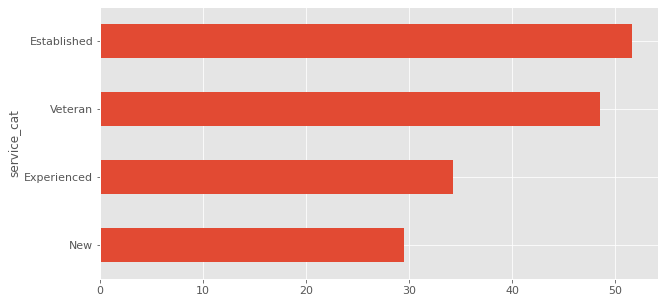

In [48]:
diss_perc.plot(kind='barh', figsize=(10,5), legend=False, fontsize=11)

We can see that of the employees who took the two serveys, Established and Veteran employees are more likely to resign due to dissatisfaction. New employees are less likely to do so.

In [49]:
# Create a pivot table to find count of dissatisfied employees and assign to new dataframe
diss_count = combined_updated.pivot_table(index='service_cat', values='dissatisfied', aggfunc='sum').sort_values(by='dissatisfied')

In [50]:
diss_count

,dissatisfied
service_cat,
Established,32.0
New,57.0
Experienced,59.0
Veteran,66.0


We see the number of people in each service category who left due to dissatisfaction.

### Dissatisfaction by Age

First we should investigate the `age` column and clean the data by grouping them into easy-to-understand categories. Our aim is to understand how many people in each age group resigned due to dissatisfaction.

In [51]:
combined_updated['age'].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
26  30           32
31  35           32
36  40           32
56 or older      29
21-25            29
31-35            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

We can see that the minimum age here is ' less than 20' and maximum is '61+'. 

Age groups will be as follows:
- <20
- 20s
- 30s
- 40s
- 50s
- 60+

The age group '56 or older' will be classified as 50s.

In [52]:
# Define a function to classiffy ages
def age_classify(s):
    if "20 or younger" in s:
        return '< 20'
    elif s[0] == '2':
        return '20s'
    elif s[0] == '3':
        return '30s'
    elif s[0] == '4':
        return '40s'
    elif s[0] == '5':
        return '50s'
    elif s[0] == '6':
        return '60s'
    elif s == 'NaN':
        return np.nan 

In [53]:
# Convert ages into string type
combined_updated['age'] = combined_updated['age'].astype(str)

In [54]:
#Apply age_classify function to the age column in combined_updated dataframe
combined_updated['age'] = combined_updated['age'].apply(age_classify)

In [55]:
combined_updated['age'].value_counts()

40s     174
30s     134
20s     129
50s     126
60s      23
< 20     10
Name: age, dtype: int64

The ages are now classified according to the categories we had set. 

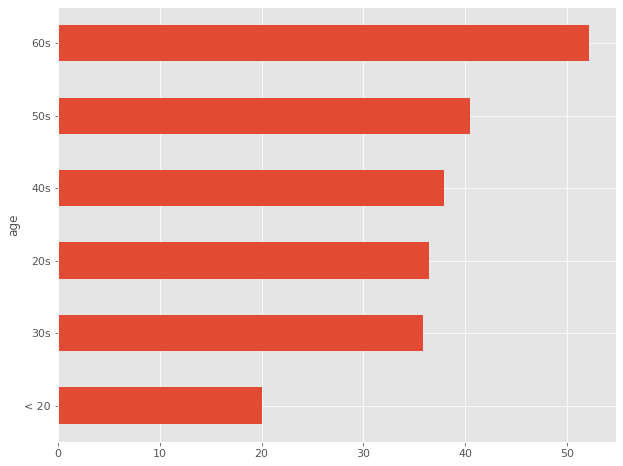

In [56]:
diss_age_perc = combined_updated.pivot_table(index='age', values='dissatisfied').sort_values(by='dissatisfied')
diss_age_perc['dissatisfied'] = (diss_age_perc['dissatisfied'] * 100).copy()
diss_age_perc.plot(kind='barh', figsize=(10,8), legend=False, fontsize=11)

In [57]:
diss_age_count = combined_updated.pivot_table(index='age', values='dissatisfied', aggfunc='sum').sort_values(by='dissatisfied')
diss_age_count

,dissatisfied
age,
< 20,2.0
60s,12.0
20s,47.0
30s,48.0
50s,51.0
40s,66.0


In [58]:
diss_age_perc

,dissatisfied
age,
< 20,20.000000
30s,35.820896
20s,36.434109
40s,37.931034
50s,40.476190
60s,52.173913


From the plot above, we can see that the more than 40% of employees in their 50s and 60s resigned due to dissatisfaction, while the percentage for younger employees are lower. 

### Dissatisfaction by institute (DETE, TAFE)

Here, we would like to investigate in which institute did the employees resign more due to dissatisfaction. 

In [59]:
diss_institute_perc = combined_updated.pivot_table(index='institute', values='dissatisfied')
diss_institute_perc['dissatisfied'] = (diss_institute_perc['dissatisfied'] * 100).copy()
diss_institute_count = combined_updated.pivot_table(index='institute', values='dissatisfied', aggfunc='sum')

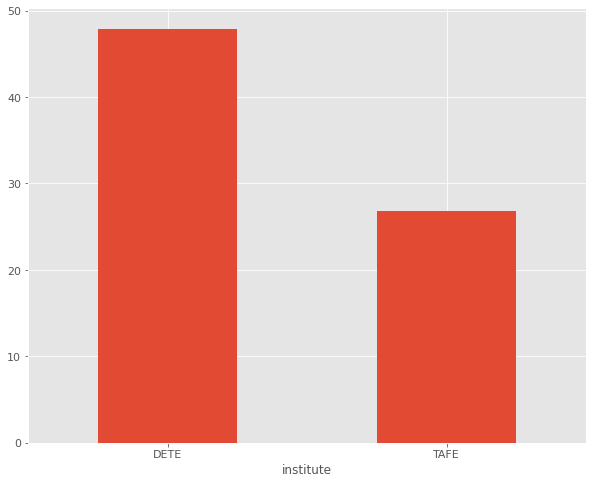

In [60]:
diss_institute_perc.plot(kind='bar', figsize=(10,8), legend=False, fontsize=11, rot=0)

In [61]:
diss_institute_count

,dissatisfied
institute,
DETE,149.0
TAFE,91.0


We see that about 48% of the employees in DETE (149 employees) had resigned due to dissatisfaction, while only 26% of employees (91 employees) had resigned due to dissatisfaction from TAFE.

### Dissatisfaction by Gender

In [62]:
combined_updated['gender'].value_counts(normalize=True)

Female    0.716216
Male      0.283784
Name: gender, dtype: float64

Our first observation here is that 71.6% of the respondents who had indicated their gender are female, while only 28.4% are male. 

In [63]:
diss_gender = combined_updated.pivot_table(index='gender', values='dissatisfied')
diss_gender['dissatisfied'] = (diss_gender['dissatisfied']*100).copy()

In [64]:
diss_gender

,dissatisfied
gender,
Female,37.028302
Male,39.880952


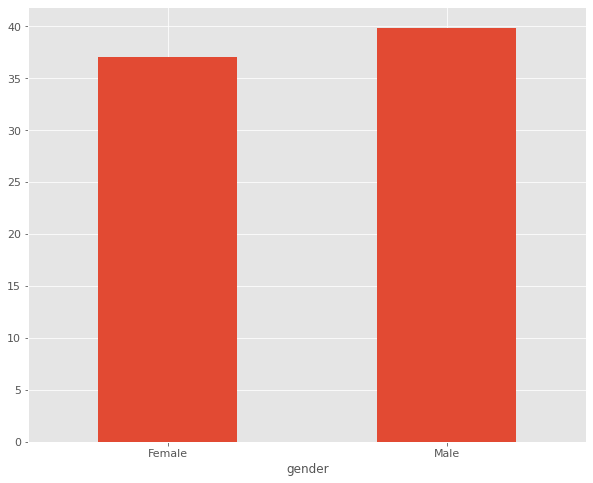

In [65]:
diss_gender.plot(kind='bar', figsize=(10,8), legend=False, fontsize=11, rot=0)

In [66]:
diss_gender_count = combined_updated.pivot_table(index='gender', values='dissatisfied', aggfunc='sum')
diss_gender_count

,dissatisfied
gender,
Female,157.0
Male,67.0


We see that males resigned more than females by 2% points. In raw numbers, more females have resigned, but this is due to the fact that there are about 40% more females than males in the dataset. Given this information, we can say that males are far more likely to resign due to dissatisfaction than women.

### Dissatisfaction by age and gender

In [67]:
diss_age_gender = combined_updated.pivot_table(index=['age', 'gender'], values='dissatisfied').sort_values(by='dissatisfied')
diss_age_gender['dissatisfied'] = (diss_age_gender['dissatisfied']*100).copy()


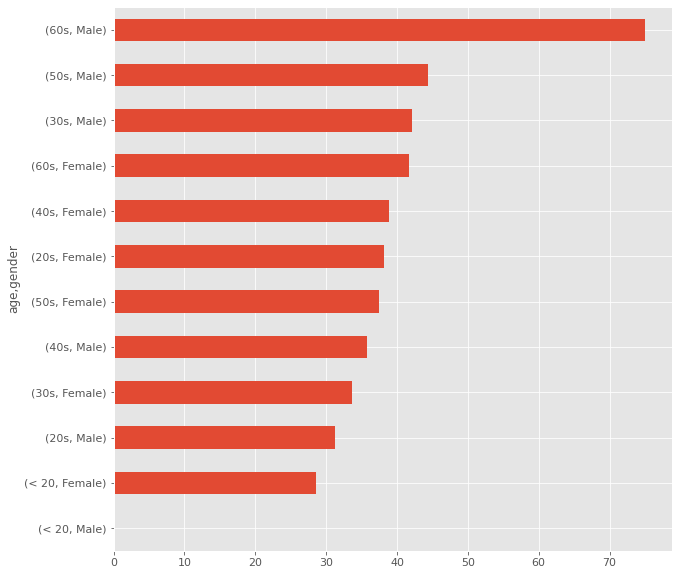

In [68]:
diss_age_gender.plot(kind='barh', figsize=(10,10), legend=False, fontsize=11, rot=0)

In [69]:
diss_age_gender

dissatisfied
age  gender              
< 20 Male        0.000000
     Female     28.571429
20s  Male       31.250000
30s  Female     33.684211
40s  Male       35.714286
50s  Female     37.500000
20s  Female     38.144330
40s  Female     38.931298
60s  Female     41.666667
30s  Male       42.105263
50s  Male       44.444444
60s  Male       75.000000

We see that teh top 4 are males in their 60s(75%), 50s(44.4%) and 30s(42.1%). (60s, Female) is 5th on the list with 41.7%. There are no reported males less than 20 years old who have resigned. 

### Dissatisfaction by position

In [70]:
combined_updated['position'].value_counts(dropna=False)

Administration (AO)                                        148
Teacher                                                    129
Teacher (including LVT)                                     95
Teacher Aide                                                63
NaN                                                         53
Cleaner                                                     39
Public Servant                                              30
Professional Officer (PO)                                   16
Operational (OO)                                            13
Head of Curriculum/Head of Special Education                10
Technical Officer                                            8
School Administrative Staff                                  8
Schools Officer                                              7
Workplace Training Officer                                   6
Technical Officer (TO)                                       5
School Based Professional Staff (Therapist, nurse, etc)

We will need to clean the entries by combining similar ones and standardising their names. First we remove entries with parantheses which will combine some of the entries. We will also rename 'School Based Professional Staff' to 'Professional Officer' and 'School Administrative Staff' to 'Administraion'. The rest will be kept as-is, since we do not know the distinctions between entries.

In [71]:
combined_updated.position = combined_updated.position.str.replace(r"\(.*\)","") \
                            .str.replace("School Based Professional Staff","Professional Officer") \
                            .str.replace("School Administrative Staff", "Administration") \
                            .str.strip()

In [72]:
combined_updated['position'].value_counts(dropna=False)

Teacher                                         224
Administration                                  156
Teacher Aide                                     63
NaN                                              53
Cleaner                                          39
Public Servant                                   30
Professional Officer                             23
Technical Officer                                13
Operational                                      13
Head of Curriculum/Head of Special Education     10
Schools Officer                                   7
Workplace Training Officer                        6
Executive                                         4
Guidance Officer                                  3
Other                                             3
Tutor                                             3
Business Service Manager                          1
Name: position, dtype: int64

In [73]:
diss_position_perc = combined_updated.pivot_table(index='position', values='dissatisfied').sort_values(by='dissatisfied')
diss_position_count = combined_updated.pivot_table(index='position', values='dissatisfied', aggfunc='sum').sort_values(by='dissatisfied')
diss_position_perc['dissatisfied'] = (diss_position_perc['dissatisfied']*100).copy()
diss_position_perc

,dissatisfied
position,
Business Service Manager,0.000000
Tutor,0.000000
Workplace Training Officer,0.000000
Professional Officer,13.043478
Administration,22.435897
Operational,23.076923
Technical Officer,30.769231
Teacher Aide,36.507937
Schools Officer,42.857143


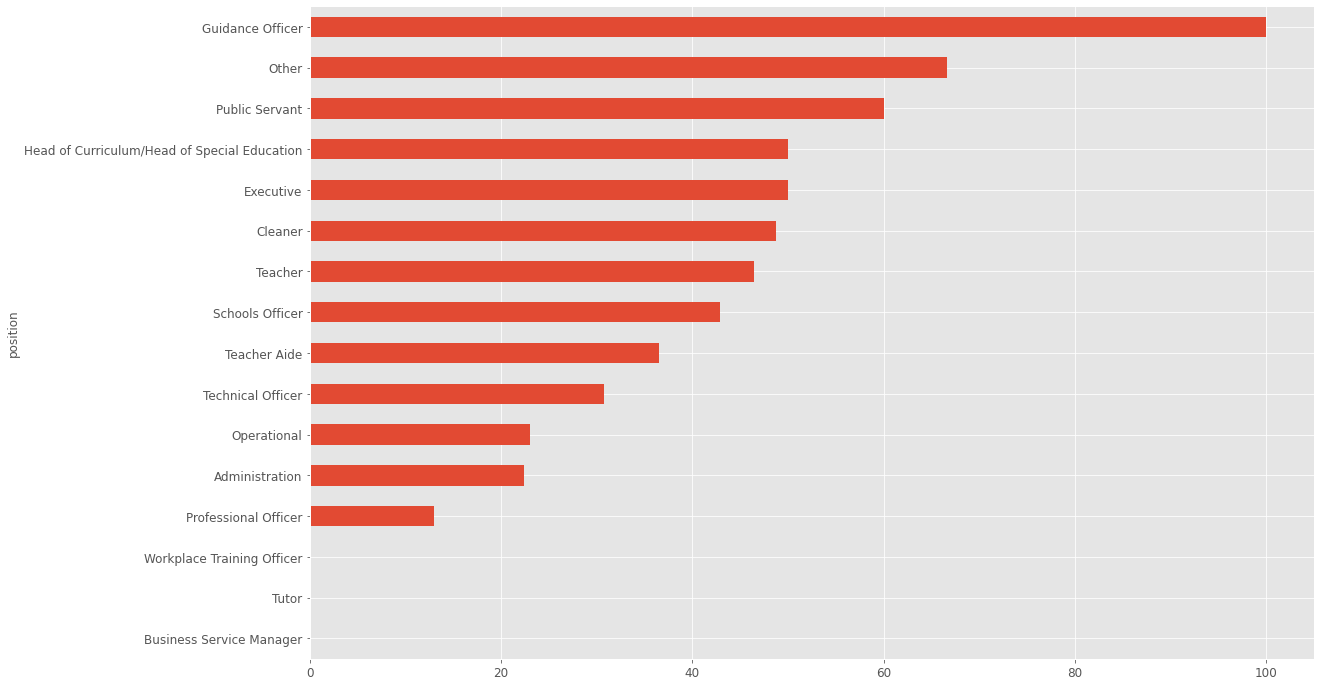

In [74]:
diss_position_perc.plot(kind='barh', figsize=(18,12), legend=False, fontsize=12, rot=0)

In [75]:
diss_position_count

,dissatisfied
position,
Business Service Manager,0.0
Tutor,0.0
Workplace Training Officer,0.0
Executive,2.0
Other,2.0
Guidance Officer,3.0
Operational,3.0
Professional Officer,3.0
Schools Officer,3.0


- We see that 100% of the Guidance Officers have resigned (3 employees)
- Workplace Training Officers, Tutors and Business Service Managers have 0% dissatisfaction
- The largest number of resigned employees are in the 'teacher position', where 46.4% have resigned (104 employees). 

### Dissatisfaction by employment status

In [76]:
combined_updated['employment_status'].value_counts(dropna=False)

Permanent Full-time    256
Permanent Part-time    150
Temporary Full-time    120
NaN                     54
Temporary Part-time     37
Contract/casual         29
Casual                   5
Name: employment_status, dtype: int64

In [77]:
combined_updated.employment_status = combined_updated.employment_status.str.replace("Casual", "Contract/casual").str.strip()

In [78]:
combined_updated['employment_status'].value_counts(dropna=False)

Permanent Full-time    256
Permanent Part-time    150
Temporary Full-time    120
NaN                     54
Temporary Part-time     37
Contract/casual         34
Name: employment_status, dtype: int64

In [79]:
diss_empstatus_perc = combined_updated.pivot_table(index="employment_status", values="dissatisfied").sort_values(by='dissatisfied')
diss_empstatus_count = combined_updated.pivot_table(index="employment_status", values="dissatisfied", aggfunc='sum').sort_values(by='dissatisfied')
diss_empstatus_perc['dissatisfied'] = (diss_empstatus_perc['dissatisfied']*100).copy()

In [80]:
diss_empstatus_perc

,dissatisfied
employment_status,
Temporary Part-time,16.216216
Contract/casual,17.647059
Temporary Full-time,25.833333
Permanent Part-time,42.666667
Permanent Full-time,46.093750


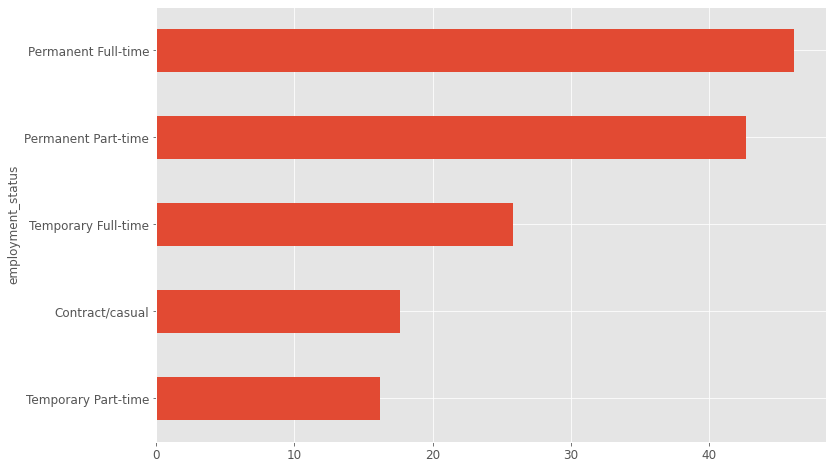

In [81]:
diss_empstatus_perc.plot(kind='barh', figsize=(12,8), legend=False, fontsize=12, rot=0)

In [82]:
diss_empstatus_count

,dissatisfied
employment_status,
Contract/casual,6.0
Temporary Part-time,6.0
Temporary Full-time,31.0
Permanent Part-time,64.0
Permanent Full-time,118.0


- 46% of Permanent Full-Time employees (118 employees) have resigned fue to dissatisfaction which is the highest percentage
- only 16.2% of Contract/casual and 17.6% of Temporary Part-time have resigned due to dissatisfaction. There were 6 employees in each category.
- Overall, more Permanent employees have reported to leave due to dissatisfaction 

## Conclusion

In this analysis, we tried to analyse the exit surveys of employees from DETE and TAFE institutes in Australia. Our analysis was focused on job dissatisfaction. The datasets were cleaned to focus on this information and then combined together. 

**Summary of findings:**  
- DETE employees resigned more than TAFE employees due to dissatisfaction
- Younger employees resigned less than their older colleagues due to dissatisfaction
- Male employees resigned more than female employees due to dissatisfaction
- Males in their 60s resigned due to dissatisfaction the most, males in their 20s the least. 
- Permanent employees resigned due to dissatisfaction more than Temporary and Contract employees
- 100% of Guidance Officers resigned due to dissatisfaction. In terms of largest number, Teachers resigned the most (46.4%)